# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from scipy.stats import linregress

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the OpenWeatherMap API key
sys.path.append("../")
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shakawe
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | tralee
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | saint-pierre-d'oleron
City not found. Skipping...
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | mejit
Processing Record 9 of Set 1 | caleta de carquin
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | alice springs
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | queenstown
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Se

Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | riberalta
Processing Record 42 of Set 4 | erenhot
Processing Record 43 of Set 4 | santa elena de uairen
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | kulia village
City not found. Skipping...
Processing Record 46 of Set 4 | muscat
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | yeppoon
Processing Record 49 of Set 4 | saudarkrokur
Processing Record 0 of Set 5 | saint-philippe
Processing Record 1 of Set 5 | ouesso
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | mangalia
Processing Record 4 of Set 5 | dul'durga
Processing Record 5 of Set 5 | bontang
Processing Record 6 of Set 5 | tolanaro
Processing Record 7 of Set 5 | tura
Processing Record 8 of Set 5 | al kiremit al 'arakiyyin
City not found. Skipping...
Processing Record 9 of Set 5 | agat village
Processing Record 10 of Set 5 | mitsami

Processing Record 30 of Set 8 | nar'yan-mar
Processing Record 31 of Set 8 | farafangana
Processing Record 32 of Set 8 | kushiro
Processing Record 33 of Set 8 | tarauaca
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | manta
Processing Record 36 of Set 8 | luis correia
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | lubang
Processing Record 39 of Set 8 | umm salal 'ali
City not found. Skipping...
Processing Record 40 of Set 8 | susuman
Processing Record 41 of Set 8 | jiexiu
Processing Record 42 of Set 8 | zelenoborskiy
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | pudozh
Processing Record 45 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 46 of Set 8 | robbah
Processing Record 47 of Set 8 | springbok
Processing Record 48 of Set 8 | st. john's
Processing Record 49 of Set 8 | ji'an
Processing Record 0 of Set 9 | cargados carajos
City not found. Skipping...
Processing Record 1

Processing Record 17 of Set 12 | jerez de la frontera
Processing Record 18 of Set 12 | natal
Processing Record 19 of Set 12 | taldykorgan
Processing Record 20 of Set 12 | mugia
Processing Record 21 of Set 12 | kathu
Processing Record 22 of Set 12 | cairns city
City not found. Skipping...
Processing Record 23 of Set 12 | benjamin hill
Processing Record 24 of Set 12 | carutapera
Processing Record 25 of Set 12 | ocean shores
Processing Record 26 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 27 of Set 12 | anshun
Processing Record 28 of Set 12 | north bend
Processing Record 29 of Set 12 | wenshan city
City not found. Skipping...
Processing Record 30 of Set 12 | zheleznogorsk-ilimskiy
Processing Record 31 of Set 12 | ampanihy
Processing Record 32 of Set 12 | kolosovka
Processing Record 33 of Set 12 | egilsstadir
Processing Record 34 of Set 12 | mochudi
Processing Record 35 of Set 12 | mukah
City not found. Skipping...
Processing Record 36 of Set 12 | howrah
Processing R

In [4]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shakawe,-18.3667,21.8500,25.00,39,98,3.10,BW,1697066596
1,bethel,41.3712,-73.4140,16.20,74,0,0.00,US,1697066569
2,tralee,52.2704,-9.7026,10.13,91,98,2.62,IE,1697066597
3,arraial do cabo,-22.9661,-42.0278,22.92,94,0,5.66,BR,1697066597
4,isafjordur,66.0755,-23.1240,0.94,85,100,13.27,IS,1697066597


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Rename Max Temp column 
city_data_df.rename(columns = {"Max Temp": "temp"}, inplace = True)

# Display sample data
city_data_df.head()

,City,Lat,Lng,temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shakawe,-18.3667,21.8500,25.00,39,98,3.10,BW,1697066596
1,bethel,41.3712,-73.4140,16.20,74,0,0.00,US,1697066569
2,tralee,52.2704,-9.7026,10.13,91,98,2.62,IE,1697066597
3,arraial do cabo,-22.9661,-42.0278,22.92,94,0,5.66,BR,1697066597
4,isafjordur,66.0755,-23.1240,0.94,85,100,13.27,IS,1697066597


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

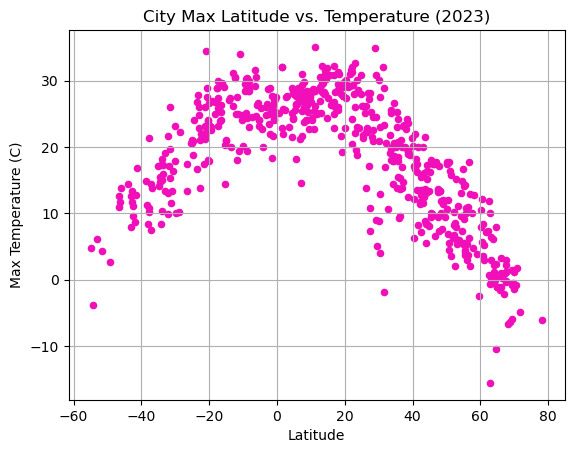

In [15]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = "Lat", 
                          y = "temp", 
                          color = "#f00fb8", 
                          xlabel = "Latitude", 
                          ylabel = "Max Temperature (C)", 
                          title = "City Max Latitude vs. Temperature (2023-10-11)", 
                          grid = True)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

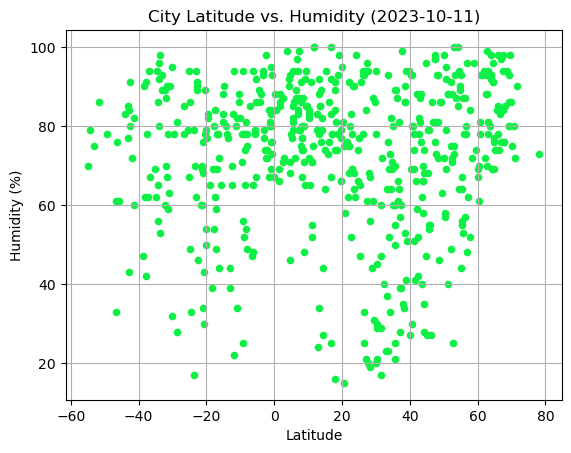

In [20]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", 
                          y = "Humidity", 
                          color = "#0FF047",  
                          xlabel = "Latitude", 
                          ylabel = "Humidity (%)", 
                          title = "City Latitude vs. Humidity (2023-10-11)", 
                          grid = True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

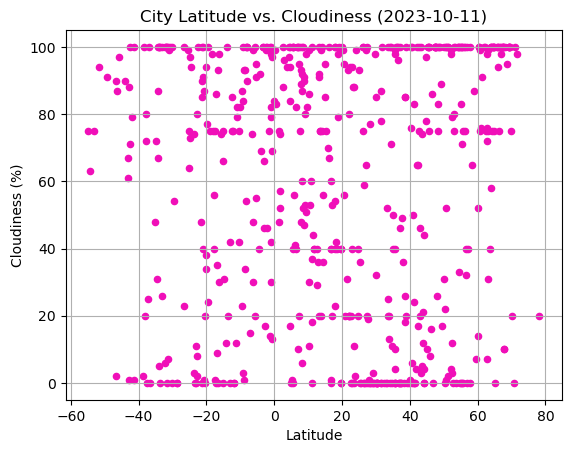

In [21]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", 
                          y = "Cloudiness", 
                          color = "#f00fb8", 
                          xlabel = "Latitude", 
                          ylabel = "Cloudiness (%)", 
                          title = "City Latitude vs. Cloudiness (2023-10-11)", 
                          grid = True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

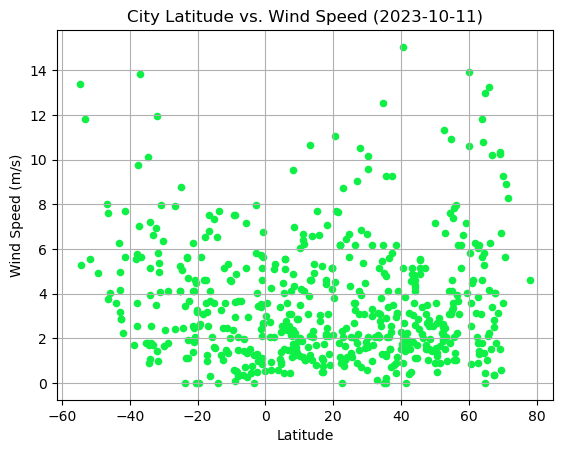

In [22]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", 
                          y = "Wind Speed", 
                          color = "#0FF047",  
                          xlabel = "Latitude", 
                          ylabel = "Wind Speed (m/s)", 
                          title = "City Latitude vs. Wind Speed (2023-10-11)", 
                          grid = True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


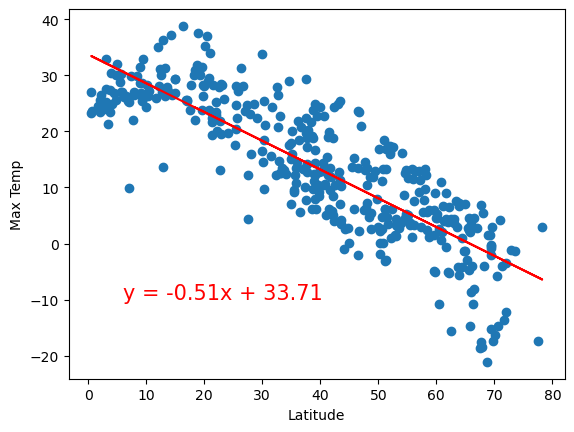

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


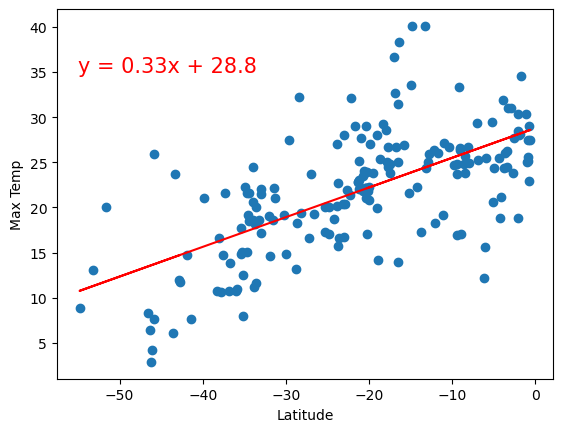

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


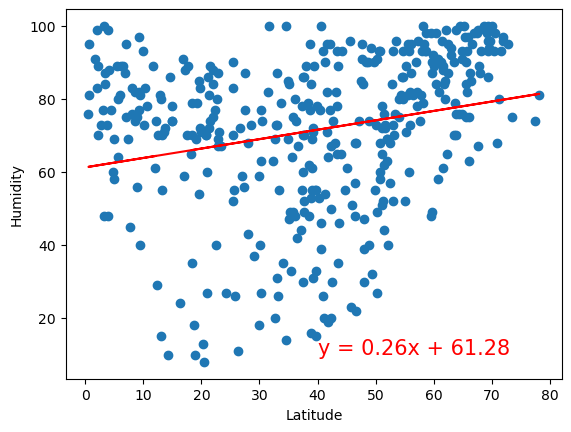

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


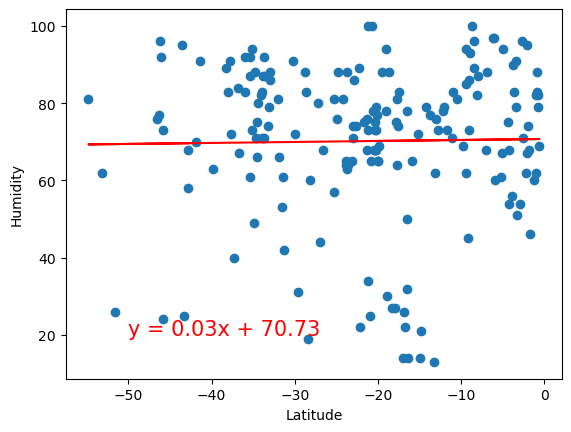

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


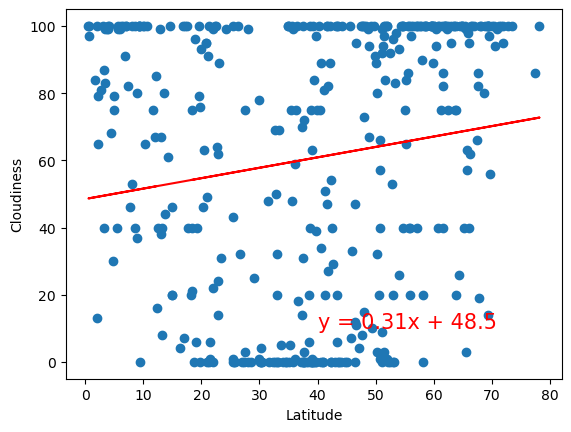

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


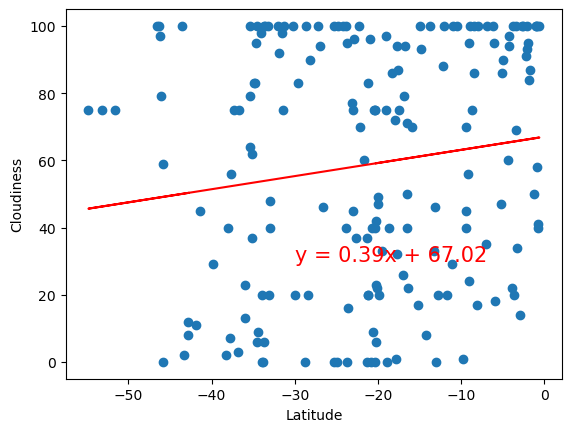

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


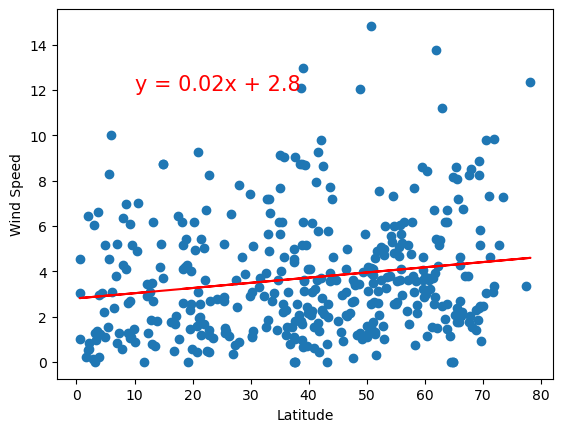

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


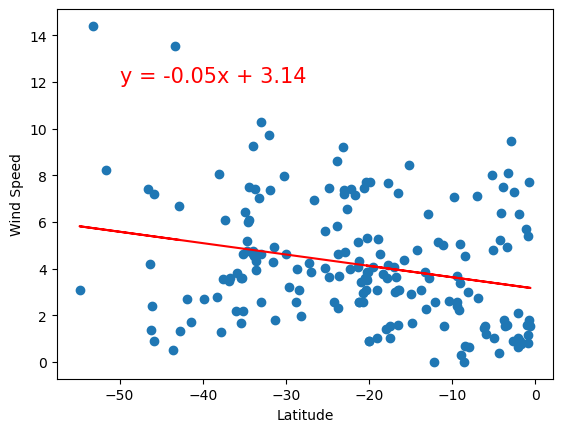

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE